Loading up the survey data

In [70]:
library(tidyverse)
reforms <- read_csv("Potential Reform Survey (Responses) - Form Responses 1.csv")

Rows: 2 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Timestamp, How would you rate each of these reforms as good or bad...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [71]:
reforms

Timestamp,How would you rate each of these reforms as good or bad for democracy? [House elected using proportional representation (by state)],How would you rate each of these reforms as good or bad for democracy? [Ranked choice voting for president],How would you rate each of these reforms as good or bad for democracy? [Abolish the electoral college for national popular vote],How would you rate each of these reforms as good or bad for democracy? [Election day a national holiday],How would you rate each of these reforms as good or bad for democracy? [Make Senate proportional to population],How would you rate each of these reforms as good or bad for democracy? [Ban partisan redistricting (gerrymandering)],How would you rate each of these reforms as good or bad for democracy? [18 year term-limit for Supreme Court justices],How would you rate each of these reforms as good or bad for democracy? [Automatic registration at 18],How consequential would each of these reforms be? [House elected using proportional representation (by state)],⋯,How consequential would each of these reforms be? [18 year term-limit for Supreme Court justices],How consequential would each of these reforms be? [Automatic registration at 18],How feasible is each reform? [House elected using proportional representation (by state)],How feasible is each reform? [Ranked choice voting for president],How feasible is each reform? [Abolish the electoral college for national popular vote],How feasible is each reform? [Election day a national holiday],How feasible is each reform? [Make Senate proportional to population],How feasible is each reform? [Ban partisan redistricting (gerrymandering)],How feasible is each reform? [18 year term-limit for Supreme Court justices],How feasible is each reform? [Automatic registration at 18]
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4/24/2025 10:44:26,Probably good,Neutral/Unsure,Definitely good,Definitely good,Definitely good,Definitely good,Definitely good,Definitely good,Large impact,⋯,Moderate impact,Minimal impact,Very unlikely,Very unlikely,Very unlikely,Somewhat unlikely,Impossible,Very unlikely,Very unlikely,Somewhat unlikely
4/24/2025 11:01:28,Probably bad,Definitely bad,Neutral/Unsure,Definitely good,Probably good,Probably good,Probably good,Probably good,Very large impact,⋯,Large impact,Moderate impact,Somewhat unlikely,Somewhat unlikely,Very unlikely,Very plausible,Impossible,Somewhat unlikely,Very unlikely,Plausible


In [72]:
# Fixing names
names(reforms) <- gsub("How would you rate each of these reforms as good or bad for democracy\\?", "good", names(reforms))
names(reforms) <- gsub("How consequential would each of these reforms be\\?", "imp", names(reforms))
names(reforms) <- gsub("How feasible is each reform\\?", "feasible", names(reforms))
names(reforms) <- gsub("\\[Ranked choice voting for president\\]", "rcv", names(reforms))
names(reforms) <- gsub("\\[Abolish the electoral college for national popular vote\\]", "ec", names(reforms))
names(reforms) <- gsub("\\[House elected using proportional representation \\(by state\\)\\]", "pr", names(reforms))
names(reforms) <- gsub("\\[Election day a national holiday\\]", "hol", names(reforms))
names(reforms) <- gsub("\\[Ban partisan redistricting \\(gerrymandering\\)\\]", "gmd", names(reforms))
names(reforms) <- gsub("\\[18 year term-limit for Supreme Court justices\\]", "sc", names(reforms))
names(reforms) <- gsub("\\[Make Senate proportional to population\\]", "sen", names(reforms))
names(reforms) <- gsub("\\[Automatic registration at 18\\]", "reg", names(reforms))
names(reforms) <- gsub(" ", "_", names(reforms))
names(reforms)

[1] "Timestamp"    "good_pr"      "good_rcv"     "good_ec"      "good_hol"    
 [6] "good_sen"     "good_gmd"     "good_sc"      "good_reg"     "imp_pr"      
[11] "imp_rcv"      "imp_ec"       "imp_hol"      "imp_sen"      "imp_gmd"     
[16] "imp_sc"       "imp_reg"      "feasible_pr"  "feasible_rcv" "feasible_ec" 
[21] "feasible_hol" "feasible_sen" "feasible_gmd" "feasible_sc"  "feasible_reg"

In [73]:
# Recoding the good variables
recode_good_bad <- function(x) {
  recode_vals <- c(
    "Definitely bad" = -1,
    "Probably bad" = -0.5,
    "Neutral/Unsure" = 0,
    "Probably good" = 0.5,
    "Definitely good" = 1
  )
  out <- recode_vals[x]
  if (length(out) != length(x)) return(rep(NA_real_, length(x)))  # fallback for mismatches
  return(out)
}

# variables to recode
target_cols <- names(reforms)[grepl("^good_", names(reforms)) & sapply(reforms, is.character)]

# Doing the recoding
for (col in target_cols) {
  reforms[[col]] <- recode_good_bad(reforms[[col]])
}


In [74]:
# Recoding the importance variables
recode_imp <- function(x) {
  recode_vals <- c(
    "No impact" = 0,
    "Minimal impact" = .25,
    "Moderate impact" = .5,
    "Large impact" = 0.75,
    "Very large impact" = 1
  )
  out <- recode_vals[x]
  if (length(out) != length(x)) return(rep(NA_real_, length(x)))  # fallback for mismatches
  return(out)
}

# Which ones to recode
target_cols <- names(reforms)[grepl("^imp", names(reforms)) & sapply(reforms, is.character)]

# Doing the recoding
for (col in target_cols) {
  reforms[[col]] <- recode_imp(reforms[[col]])
}


In [75]:
# Recoding the feasible variables
recode_feas <- function(x) {
  recode_vals <- c(
    "Impossible" = 0,
    "Very unlikely" = .25,
    "Somewhat unlikely" = .5,
    "Plausible" = 0.75,
    "Very plausible" = 1
  )
  out <- recode_vals[x]
  if (length(out) != length(x)) return(rep(NA_real_, length(x)))  # fallback for mismatches
  return(out)
}

# Which ones to recode
target_cols <- names(reforms)[grepl("^feasible", names(reforms)) & sapply(reforms, is.character)]

# Doing the recoding
for (col in target_cols) {
  reforms[[col]] <- recode_feas(reforms[[col]])
}

In [76]:
head(reforms)

Timestamp,good_pr,good_rcv,good_ec,good_hol,good_sen,good_gmd,good_sc,good_reg,imp_pr,⋯,imp_sc,imp_reg,feasible_pr,feasible_rcv,feasible_ec,feasible_hol,feasible_sen,feasible_gmd,feasible_sc,feasible_reg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/24/2025 10:44:26,0.5,0,1,1,1.0,1.0,1.0,1.0,0.75,⋯,0.50,0.25,0.25,0.25,0.25,0.5,0,0.25,0.25,0.50
4/24/2025 11:01:28,-0.5,-1,0,1,0.5,0.5,0.5,0.5,1.00,⋯,0.75,0.50,0.50,0.50,0.25,1.0,0,0.50,0.25,0.75


In [77]:
# Now create an average for each of the variables
reform_keys <- c("pr", "rcv", "ec", "hol", "sen", "gmd", "sc", "reg")

# Initialize a new data frame
byref <- data.frame(
  reform = reform_keys,
  good = sapply(reform_keys, function(k) mean(reforms[[paste0("good_", k)]], na.rm = TRUE)),
  imp = sapply(reform_keys, function(k) mean(reforms[[paste0("imp_", k)]], na.rm = TRUE)),
  feasible = sapply(reform_keys, function(k) mean(reforms[[paste0("feasible_", k)]], na.rm = TRUE))
)

print(byref)


    reform  good   imp feasible
pr      pr  0.00 0.875    0.375
rcv    rcv -0.50 0.375    0.375
ec      ec  0.50 0.250    0.250
hol    hol  1.00 0.500    0.750
sen    sen  0.75 0.750    0.000
gmd    gmd  0.75 0.375    0.375
sc      sc  0.75 0.625    0.250
reg    reg  0.75 0.375    0.625


We can plot the perceived goodness importance with labels as follows:

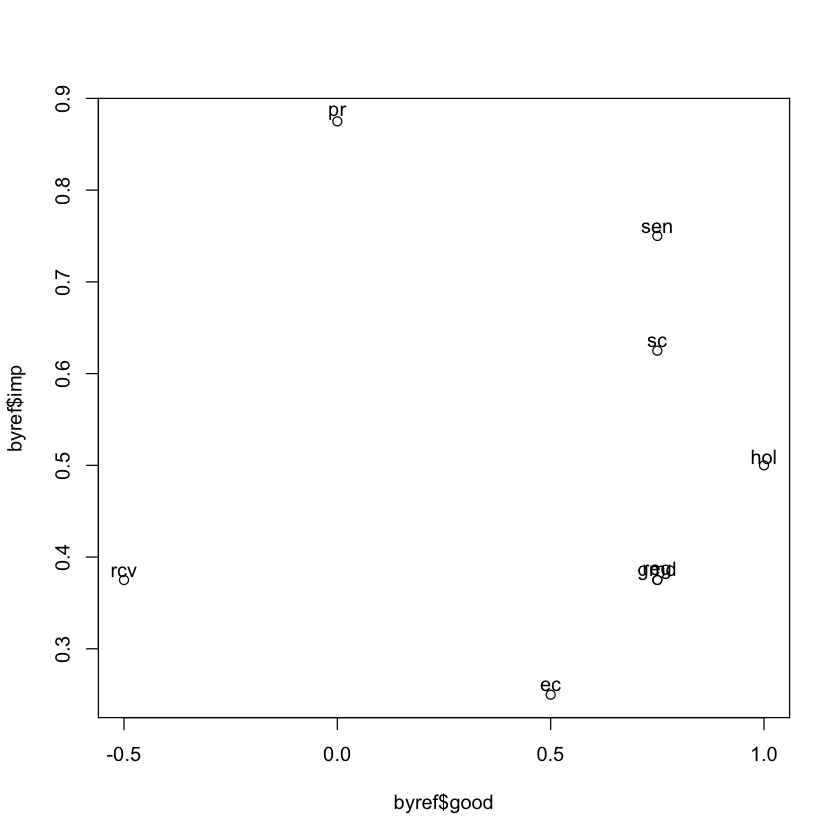

In [90]:
plot(byref$good, byref$imp)
text(byref$good, byref$imp+.01, byref$reform)

**Make a plot that also incorporates the feasibility. Based on this, what reforms might you prioritize?**